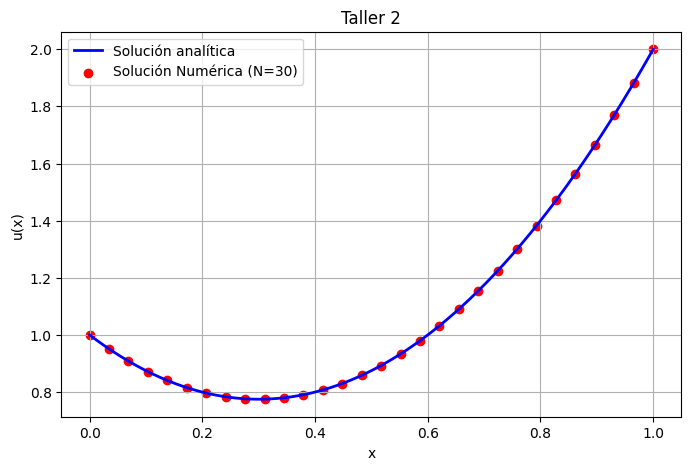

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros y condiciones de frontera
x_inicio, x_final = 0, 1  # Intervalo de x
u_inicio, u_final = 1, 2  # Condiciones de frontera
N = 30  # Número de puntos

dx = (x_final - x_inicio) / (N - 1)  # Tamaño del paso

# Definir la solución analítica
eje_x_analitico = np.linspace(x_inicio, x_final, 500)
u_analitico = (5/2) * eje_x_analitico**2 - (3/2) * eje_x_analitico + 1

# Discretización del dominio
x_discreto = np.linspace(x_inicio, x_final, N)

# Inicialización de la matriz y el vector b
A = np.zeros((N, N))
b = np.zeros(N)

# Condiciones de frontera
A[0, 0] = 1
b[0] = u_inicio

A[-1, -1] = 1
b[-1] = u_final

# Construcción de la matriz del sistema con diferencias finitas
for i in range(1, N - 1):
    A[i, i - 1] = 1
    A[i, i] = -2
    A[i, i + 1] = 1
    b[i] = 5 * dx**2  # Aplicamos el término de la ecuación diferencial

# Resolviendo el sistema
u_numerico = np.linalg.solve(A, b)

# Graficar los resultados con colores personalizados
plt.figure(figsize=(8, 5))
plt.plot(eje_x_analitico, u_analitico, label='Solución analítica', color='blue', linewidth=2)
plt.scatter(x_discreto, u_numerico, color='red', label=f'Solución Numérica (N={N})')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Taller 2")
plt.legend()
plt.grid()
plt.show()